# Lagrange插值

设想气象站在某时刻$ x_0, x_1, x_2, \cdots, x_n(x_0 < x_1 < x_2 < \cdots < x_n) $处的温度值为
$ y_0, y_1, y_2, \cdots, y_n $，在直角坐标系上标注这$ n+1 $个点$ (x_i, y_i)(i=0, 1, 2, \cdots, n) .$

但当$ x \in (x_{i_1}, x_{i}) $时，温度是未知的. 希望找到一个函数$ f: [a, b] \rightarrow \textbf{R} $，其中
$ a=x_0, b=x_n $，满足$ f(x_i)=y_i(i=0, 1, 2, \cdots, n) $，就用$ f $来作为温度函数的近似

这就是所谓的插值问题，称$ (x_i, y_i)(i=0, 1, 2, \cdots, n) $为插值的数据点

### lagrange 插值

设$ y_i=1 $，而$ y_0=\cdots =y_{i-1}=y_{i+1}=\cdots =y_n=0 $

此时可以找到一个$ n $次多项式

$$ L_i(x)=k_i(x-x_0)\cdots (x-x_{i-1})(x-x_{i+1})\cdots (x-x_n) $$

满足这些值，又由于$ L_i(x_i) = 1 $

$$ k_i = \frac{1}{(x_i-x_0)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots (x_i-x_n)} $$

于是

$$ L_i(x) = \frac{(x-x_0)\cdots (x-x_{i-1})(x-x_{i+1})\cdots (x-x_n)}{(x_i-x_0)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots (x_i-x_n)} $$

其中$ i=0, 1, 2, \cdots, n $

这样，对于$ x_i(i=0, 1, 2, \cdots, n) $，都能找到一个$ n $次多项式$ L_i(x) $，使得$ L_i(x_i)=1 \text{且}L_i(x_j)=0(i \neq j) $

那么原先的插值问题的解就是$ L_0, L_1, \cdots, L_n $乘上相应的常数后叠加起来的结果，即

$$ p(x) = \sum\limits_{i=0}^{n}y_iL_i(x) $$

令$ x = x_j $，有

$$ p(x_j) = \sum\limits_{i=0}^{n}y_iL_i(x_j) = y_j\cdot 1 =y_j $$

这里设$ p $、$ q $式$ n $次多项式，且都满足插值条件，即$ p(x_i) = q(x_i) = y_i $，由此导致$ p-q $有$ n+1 $个零点

故$ p-q $是零多项式，即$ p = q $，所以上述$ p(x) $是唯一的

In [1]:
def lag_intp(x, y, a):
    """ lagrange插值函数 """
    p = 0.0
    for i in range(len(y)):
        t = y[i]
        for j in range(len(y)):
            if j != i:
                t *= (a-x[j])/(x[i]-x[j])
        p += t
    return p

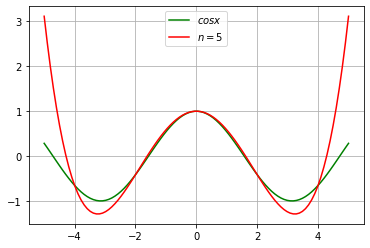

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# 6个插值点(n=5)
x = np.linspace(-4, 4, 5)
y = np.cos(x)

x1 = np.linspace(-5, 5, 100)
y1 = list()
for k in x1:
    y1.append(lag_intp(x, y, k))
y1 = np.array(y1)

plt.plot(x1, np.cos(x1), 'g', label='$cosx$')
plt.plot(x1, y1, 'r', label='$n=5$')
plt.legend(loc='upper center')
plt.grid()
plt.show()

6个点的插值，发现两端效果不是很好，接下来采用11个点的插值(n=10)

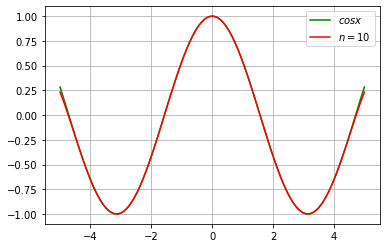

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

# n=10
x = np.linspace(-4, 4, 11)
y = np.cos(x)

x1 = np.linspace(-5, 5, 100)
y1 = list()
for k in x1:
    y1.append(lag_intp(x, y, k))
y1 = np.array(y1)

plt.plot(x1, np.cos(x1), 'g', label='$cosx$')
plt.plot(x1, y1, 'r', label='$n=10$')
plt.legend()
plt.grid()
plt.show()

好家伙，效果不错！

$$ g(x) = \frac{1}{1+x^2} , \qquad -6 < x < 6$$

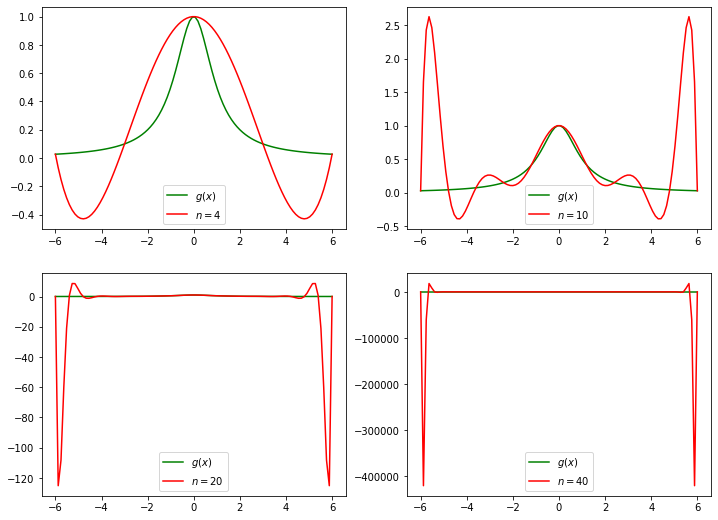

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.linspace(-6, 6, 100)

# 在(-6, 6)平均选取5个点作为插值的数据点
x1 = np.linspace(-6, 6, 5)
y1 = 1/(1+x1**2)
y11 = list()
for k in x:
    y11.append(lag_intp(x1, y1, k))
y11 = np.array(y11)
# 在(-6, 6)平均选取11个点作为插值的数据点
x2 = np.linspace(-6, 6, 11)
y2 = 1/(1+x2**2)
y22 = list()
for k in x:
    y22.append(lag_intp(x2, y2, k))
y22 = np.array(y22)
# 在(-6, 6)平均选取21个点作为插值的数据点
x3 = np.linspace(-6, 6, 21)
y3 = 1/(1+x3**2)
y33 = list()
for k in x:
    y33.append(lag_intp(x3, y3, k))
y33 = np.array(y33)
# 在(-6, 6)平均选取41个点作为插值的数据点
x4 = np.linspace(-6, 6, 41)
y4 = 1/(1+x4**2)
y44 = list()
for k in x:
    y44.append(lag_intp(x4, y4, k))
y44 = np.array(y44)

# 绘图
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
# n=4
ax[0, 0].plot(x, 1/(1+x**2), 'g', label='$g(x)$')
ax[0, 0].plot(x, y11, 'r', label='$n=4$')
ax[0, 0].legend(loc='lower center')
# n=10
ax[0, 1].plot(x, 1/(1+x**2), 'g', label='$g(x)$')
ax[0, 1].plot(x, y22, 'r', label='$n=10$')
ax[0, 1].legend(loc='lower center')
# n=20
ax[1, 0].plot(x, 1/(1+x**2), 'g', label='$g(x)$')
ax[1, 0].plot(x, y33, 'r', label='$n=20$')
ax[1, 0].legend(loc='lower center')
# n=40
ax[1, 1].plot(x, 1/(1+x**2), 'g', label='$g(x)$')
ax[1, 1].plot(x, y44, 'r', label='$n=40$')
ax[1, 1].legend(loc='lower center')

plt.show()

当$ n $次数越高时，插值后的图像在两端出现震荡，称为龙格现象

#### 虽然$ lagrange $插值法可以满足插值条件，但不够稳定，故需要追求更稳定的插值方法